In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

输出两个图分别为标记图，以及在原图基础上标记出前景的红色边界分割图。

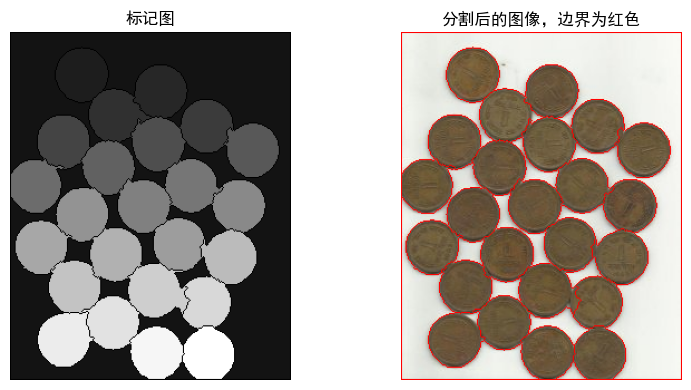

In [24]:
img = cv2.imread('watershed.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#使用大律法OTSU对图像进行二值化处理
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# 噪音去除
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) # 形态开运算

# 确定的背景图
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# 确定的前景图
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# 不确定区域，不能确定是背景还是前景
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


# 创建标记
ret, markers = cv2.connectedComponents(sure_fg)#用0标记图像的背景，用大于0的整数标记其他对象

# 加一，用1来标记图像的背景
markers = markers+1

# 将不确定区域标记为0
markers[unknown==255] = 0

#使用分水岭算法执行基于标记的图像分割，分离前景与背景
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255] #边界标记为红色


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(markers, 'gray'), plt.xticks([]), plt.yticks([]),plt.title('标记图'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.xticks([]), plt.yticks([]),plt.title('分割后的图像，边界为红色'), plt.axis('off')
plt.tight_layout()
plt.show()